In [ ]:
# This notebook will use the dataset COVID-19 to predict the death rates.
# To do this we will provide a model with a description of death rates around the world. 

# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-14j_d0se
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-14j_d0se
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0dfd9739e4bdcce166dc6326afcde41af9a5f8641_-cp36-none-any.whl size=119874 sha256=896a34d7000a2527e626e69e2f3f712c166e7c9bf211babc5b02d59b54b1c96d
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7kgd25v/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pandas as pd


In [ ]:
# Importing dataset using pandas
# Using head not tail
dataset_data= pd.read_csv('covid.csv')
dataset = dataset_data.copy()
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
# Clean the data
# Check if it contains unknown values
dataset.sum()


location                           AfghanistanAfghanistanAfghanistanAfghanistanAf...
date                               2019-12-312020-01-012020-01-022020-01-032020-0...
total_cases                                                              9.90781e+08
new_cases                                                                 2.2107e+07
total_deaths                                                             5.81982e+07
new_deaths                                                               1.05252e+06
total_cases_per_million                                                  2.36002e+07
new_cases_per_million                                                         437411
total_deaths_per_million                                                      948459
new_deaths_per_million                                                       14664.7
total_tests                                                               4.6194e+09
new_tests                                                        

In [ ]:
# Drop these rows
dataset = dataset.dropna()

In [ ]:
# Split the data into train and test
# We will use our test set in the final evaluation of our model
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

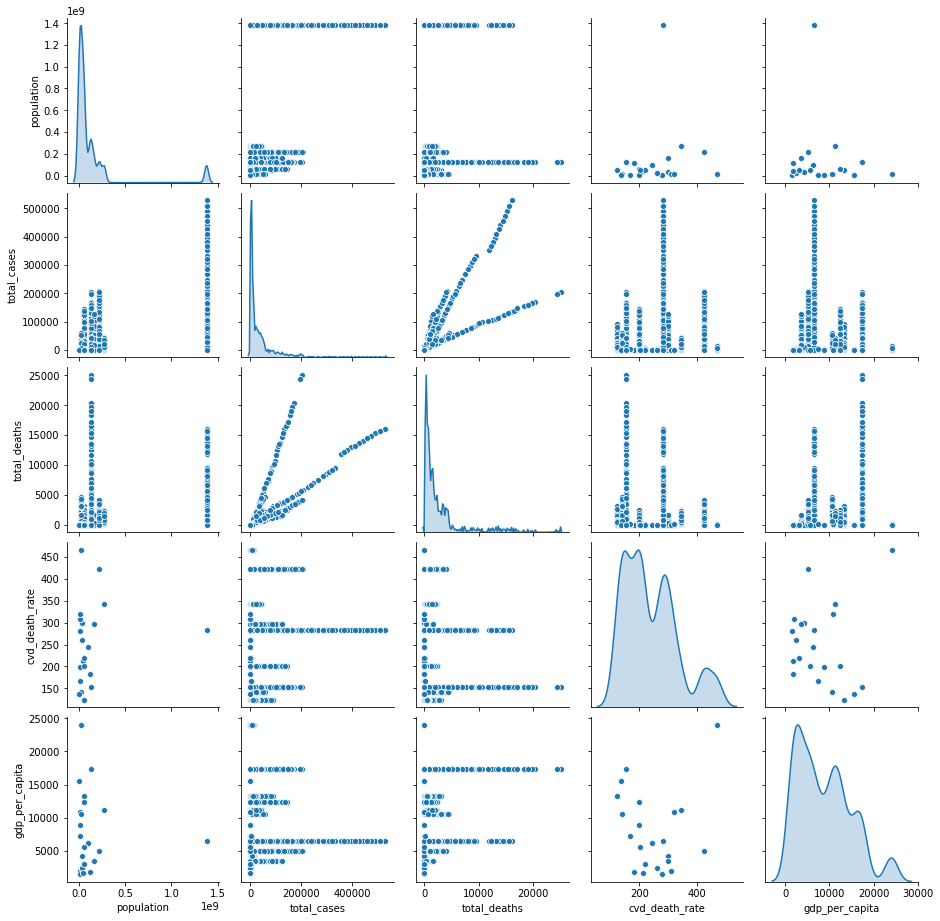

In [ ]:
# Inspect the data
# Look at join distributions of afew pairs of collumns from the training set
sns.pairplot(train_dataset[["population", "total_cases", "total_deaths", "cvd_death_rate", "gdp_per_capita"]], diag_kind="kde")

In [ ]:
# Overall statistics
train_stats = train_dataset.describe()
train_stats.pop("cvd_death_rate")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
total_cases,1484.0,2.027919e+04,5.440835e+04,0.000,2.220000e+02,1.265000e+03,1.239125e+04,5.288590e+05
new_cases,1484.0,7.773902e+02,2.011995e+03,-2461.000,5.000000e+00,6.700000e+01,4.917500e+02,1.990600e+04
total_deaths,1484.0,8.477965e+02,2.520633e+03,0.000,4.000000e+00,2.400000e+01,3.797500e+02,2.506000e+04
new_deaths,1484.0,3.195418e+01,1.057550e+02,0.000,0.000000e+00,1.000000e+00,1.825000e+01,2.003000e+03
total_cases_per_million,1484.0,2.408909e+02,4.944830e+02,0.000,5.413250e+00,5.816550e+01,2.114292e+02,3.301978e+03
new_cases_per_million,1484.0,7.449832e+00,1.471920e+01,-139.488,2.182500e-01,1.693500e+00,8.955250e+00,1.215670e+02
total_deaths_per_million,1484.0,1.158996e+01,3.770728e+01,0.000,1.100000e-01,1.262000e+00,4.061000e+00,2.593650e+02
new_deaths_per_million,1484.0,3.426651e-01,1.130976e+00,0.000,0.000000e+00,9.000000e-03,1.655000e-01,1.745700e+01
total_tests,1484.0,2.671488e+05,8.355970e+05,22.000,1.163275e+04,4.731650e+04,1.626832e+05,8.227802e+06
new_tests,1484.0,8.575561e+03,2.451950e+04,-3743.000,4.147500e+02,1.741000e+03,5.548250e+03,2.310950e+05


In [ ]:
train_labels = train_dataset.pop('cvd_death_rate')
test_labels = test_dataset.pop('cvd_death_rate')